<a href="https://colab.research.google.com/github/Rishitha2805/Outbreak-Prediction-of-Covid-19-in-INDIA/blob/main/ML_Project_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
# Visualisation libraries
import matplotlib.pyplot as plt
import random
import math
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from fbprophet import Prophet
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
plt.style.use('fivethirtyeight')
%matplotlib inline
# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12
 
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#This cell's code is required when you are working with plotly on colab
import plotly
plotly.io.renderers.default = 'colab'

In [ ]:
df = pd.read_csv('/content/Covid_Cases_dataset.csv',parse_dates=['Date'])
df

,Country/Region,Date,Confirmed,Deaths,Recovered,Active
0,India,2020-01-01,0,0,0,0
1,India,2020-01-02,0,0,0,0
2,India,2020-01-03,0,0,0,0
3,India,2020-01-04,0,0,0,0
4,India,2020-01-05,0,0,0,0
...,...,...,...,...,...,...
175,India,2020-06-24,473105,14894,271697,186514
176,India,2020-06-25,490401,15301,285637,189463
177,India,2020-06-26,508953,15685,295881,197387
178,India,2020-06-27,528859,16095,309713,203051


In [ ]:
df.head(15)

,Country/Region,Date,Confirmed,Deaths,Recovered,Active
0,India,2020-01-01,0,0,0,0
1,India,2020-01-02,0,0,0,0
2,India,2020-01-03,0,0,0,0
3,India,2020-01-04,0,0,0,0
4,India,2020-01-05,0,0,0,0
5,India,2020-01-06,0,0,0,0
6,India,2020-01-07,0,0,0,0
7,India,2020-01-08,0,0,0,0
8,India,2020-01-09,0,0,0,0
9,India,2020-01-10,0,0,0,0


In [ ]:
# Check for India's data
# df.query('Country=="India"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [ ]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [ ]:
confirmed


,Date,Confirmed
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0
...,...,...
174,2020-06-24,473105
175,2020-06-25,490401
176,2020-06-26,508953
177,2020-06-27,528859


In [ ]:
recovered

,Date,Recovered
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0
...,...,...
174,2020-06-24,271697
175,2020-06-25,285637
176,2020-06-26,295881
177,2020-06-27,309713


In [ ]:
deaths

,Date,Deaths
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0
...,...,...
174,2020-06-24,14894
175,2020-06-25,15301
176,2020-06-26,15685
177,2020-06-27,16095


In [ ]:
# for i in range (len(confirmed)):
#   if(confirmed['Confirmed'][i]<1000000):
#     print(confirmed.iloc[i])
len(confirmed)

179

In [ ]:
dates=list(confirmed['Date'])
len(dates)

179

In [ ]:
Y_confirmed=list(confirmed.iloc[:,-1].values)
Y_deaths=list(deaths.iloc[:,-1].values)
Y_recovered=list(recovered.iloc[:,-1].values)
# Y_confirmed

In [ ]:
X=np.array([i for i in range(len(dates))]).reshape(-1,1)
Y_confirmed=np.array(Y_confirmed).reshape(-1,1)
Y_deaths=np.array(Y_deaths).reshape(-1,1)
Y_recovered=np.array(Y_recovered).reshape(-1,1)

In [ ]:
days_in_future=20
future_forecast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates=future_forecast[:-20]
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

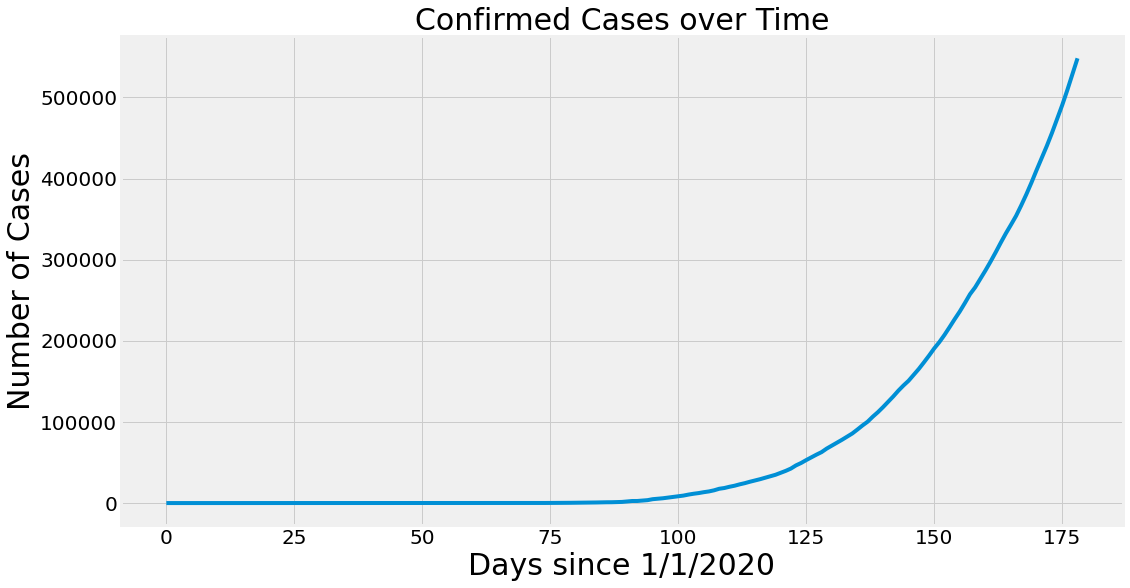

In [ ]:
adjusted_dates=adjusted_dates.reshape(1,-1)[0]
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_confirmed)
plt.title('Confirmed Cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

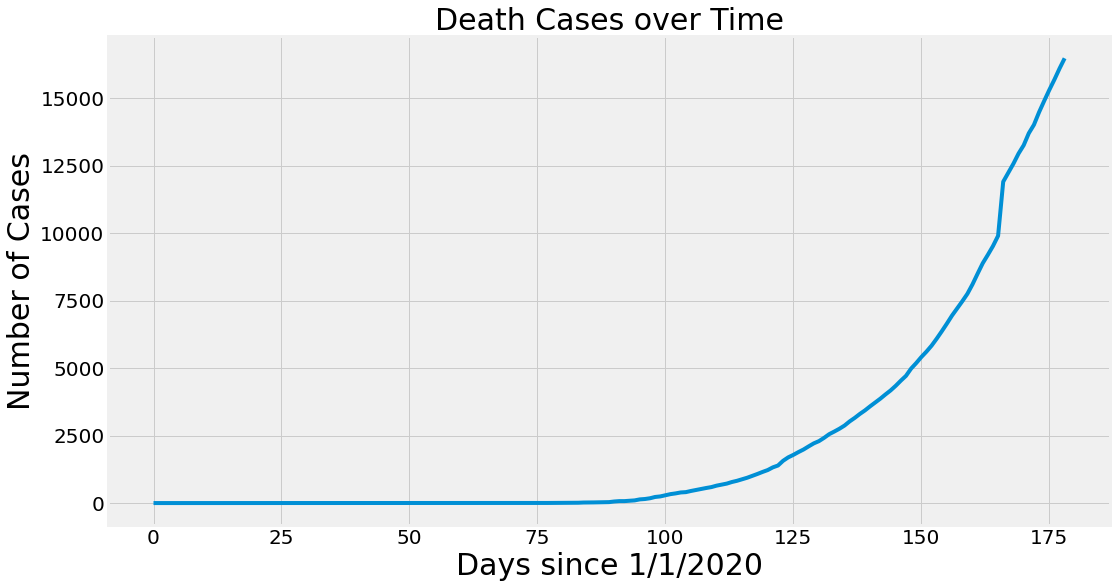

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_deaths)
plt.title('Death Cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

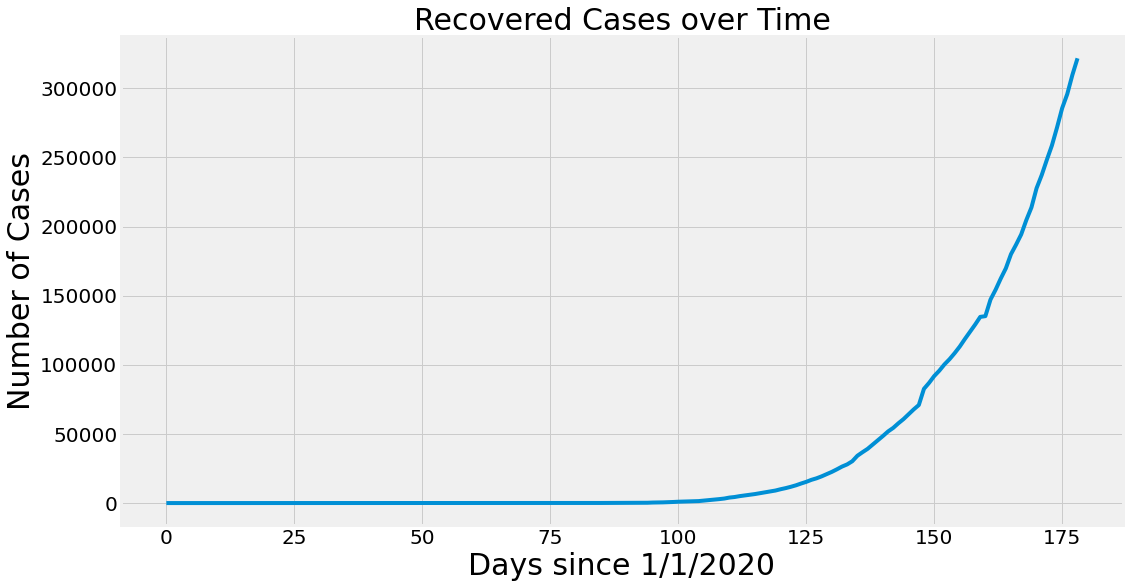

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_recovered)
plt.title('Recovered Cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
print(len(X),len(Y_confirmed))

179 179


In [ ]:
start='2020-01-01'
start_date=datetime.datetime.strptime(start,'%Y-%m-%d')
future_forecast_dates=[]
for i in range(len(future_forecast)):
  future_forecast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%Y-%m-%d'))
# X[0] = pd.to_datetime(X[0], format='%Y-%m-%d')

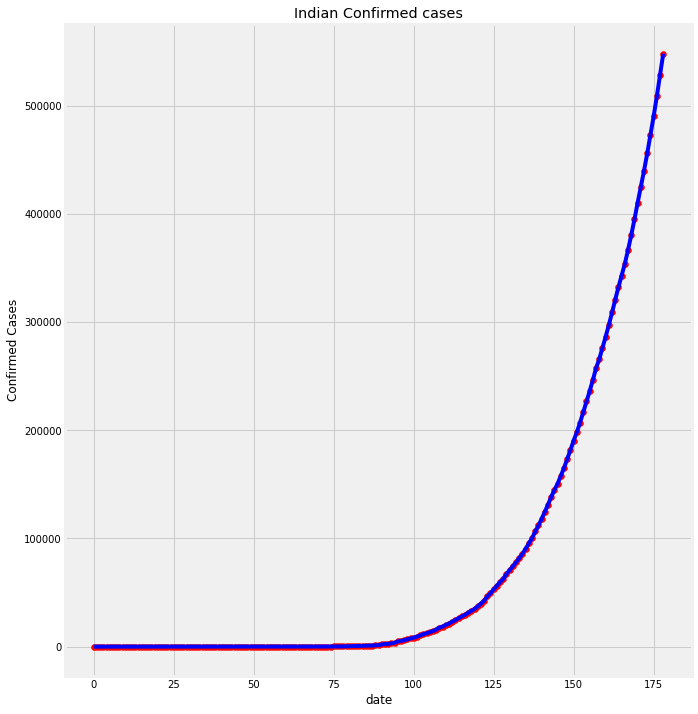

In [ ]:
plt.scatter(X,Y_confirmed,color='red')
plt.plot(X,Y_confirmed,color='blue')
plt.title('Indian Confirmed cases')
plt.xlabel('date')
plt.ylabel('Confirmed Cases')
plt.show()

In [ ]:
# from matplotlib import dates as mdates
# date = df.iloc[:,1].values
# date=pd.DataFrame(date)
# tmp = date.apply(lambda x: mdates.date2num(x))
# X=tmp.values

# ***Confirmed***

In [ ]:
X_train_confirmed,X_test_confirmed,Y_train_confirmed,Y_test_confirmed=train_test_split(X,Y_confirmed,test_size=0.2,shuffle=False)

In [ ]:
poly=PolynomialFeatures(degree=3)
poly_X_train_confirmed=poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed=poly.fit_transform(X_test_confirmed)
poly_future_forecast=poly.fit_transform(future_forecast)

In [ ]:
poly.fit(poly_X_train_confirmed,Y_train_confirmed)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

In [ ]:
regressor=LinearRegression(normalize=True,fit_intercept=False)
regressor.fit(poly_X_train_confirmed,Y_train_confirmed)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [ ]:
Y_pred_confirmed=regressor.predict(poly_X_test_confirmed)
future_pred_confirmed=regressor.predict(poly_future_forecast)
mse = math.sqrt(mean_squared_error(Y_test_confirmed, Y_pred_confirmed)) 
print('Root mean square error', mse) 
mae = math.sqrt(mean_absolute_error(Y_test_confirmed, Y_pred_confirmed)) 
print('Root mean absolute error', mae) 

Root mean square error 98469.74356644829
Root mean absolute error 289.3116283104797


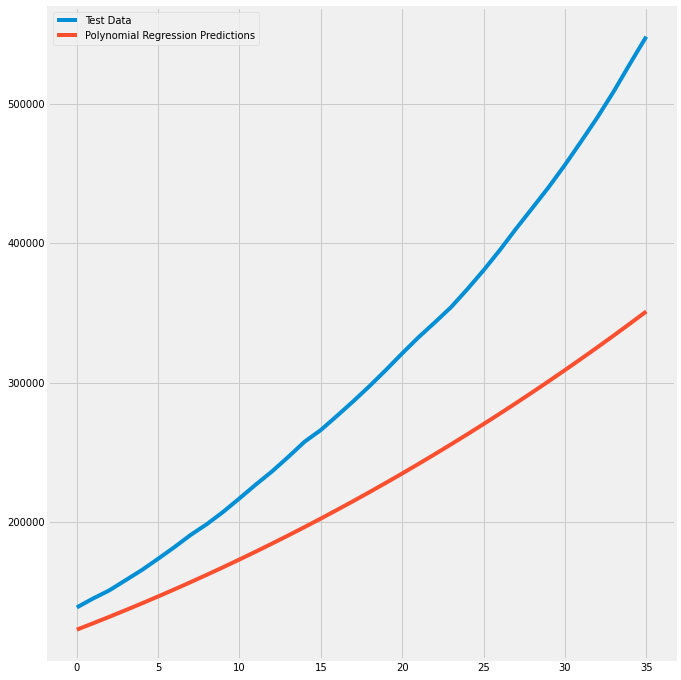

In [ ]:
plt.plot(Y_test_confirmed)
plt.plot(Y_pred_confirmed)
plt.legend(['Test Data','Polynomial Regression Predictions'])

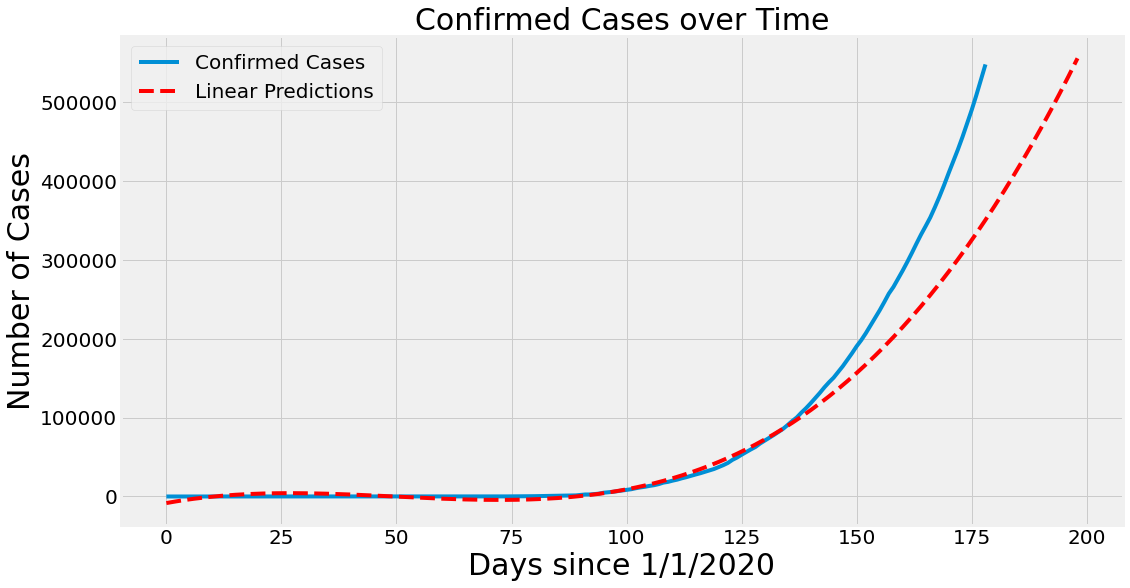

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_confirmed)
plt.plot(future_forecast,future_pred_confirmed,linestyle='dashed',color='red')
plt.title('Confirmed Cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Confirmed Cases','Linear Predictions'],prop={'size':20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
tmp=future_pred_confirmed
future_pred_confirmed=np.append(tmp[0],tmp[1:])

In [ ]:
linear_df=pd.DataFrame({'Date':future_forecast_dates[-20:],'Linear Predicted # number of Confirmed cases in India':np.round(future_pred_confirmed[-20:])})
linear_df

,Date,Linear Predicted # number of Confirmed cases in India
0,2020-06-28,359849.0
1,2020-06-29,368832.0
2,2020-06-30,377959.0
3,2020-07-01,387229.0
4,2020-07-02,396645.0
5,2020-07-03,406208.0
6,2020-07-04,415918.0
7,2020-07-05,425777.0
8,2020-07-06,435785.0
9,2020-07-07,445945.0


# ***Deaths***

In [ ]:
X_train_deaths,X_test_deaths,Y_train_deaths,Y_test_deaths=train_test_split(X,Y_deaths,test_size=0.2,shuffle=False)

In [ ]:
poly=PolynomialFeatures(degree=3)
poly_X_train_deaths=poly.fit_transform(X_train_deaths)
poly_X_test_deaths=poly.fit_transform(X_test_deaths)
poly_future_forecast=poly.fit_transform(future_forecast)

In [ ]:
poly.fit(poly_X_train_deaths,Y_train_deaths)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

In [ ]:
regressor=LinearRegression(normalize=True,fit_intercept=False)
regressor.fit(poly_X_train_deaths,Y_train_deaths)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [ ]:
Y_pred_deaths=regressor.predict(poly_X_test_deaths)
future_pred_deaths=regressor.predict(poly_future_forecast)
mse = math.sqrt(mean_squared_error(Y_test_deaths, Y_pred_deaths)) 
print('Root mean square error', mse) 
mae = math.sqrt(mean_absolute_error(Y_test_deaths, Y_pred_deaths)) 
print('Root mean absolute error', mae) 

Root mean square error 3021.985547306603
Root mean absolute error 48.205087402502244


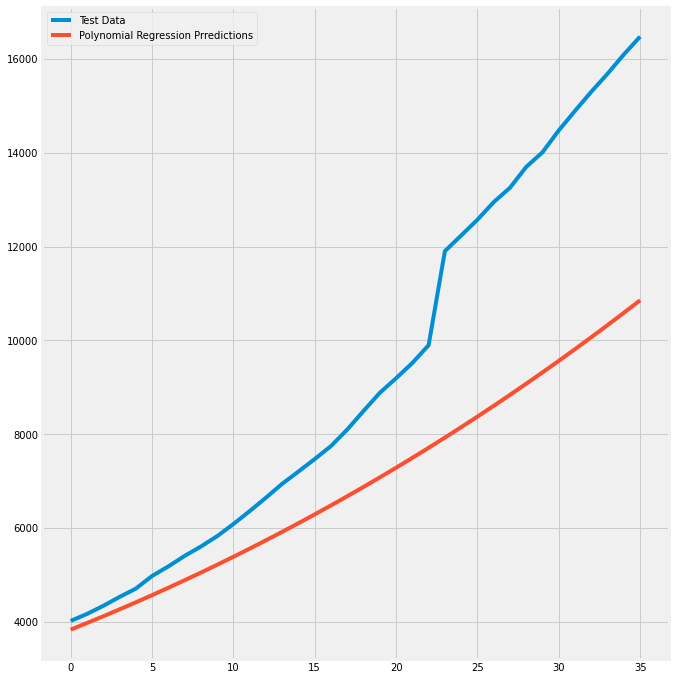

In [ ]:
plt.plot(Y_test_deaths)
plt.plot(Y_pred_deaths)
plt.legend(['Test Data','Polynomial Regression Prredictions'])

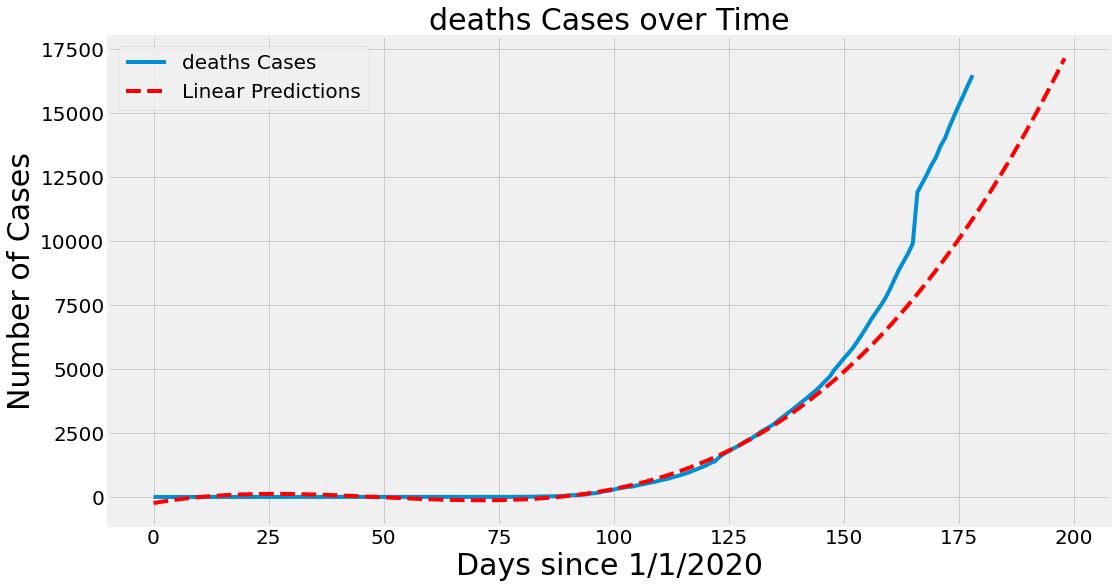

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_deaths)
plt.plot(future_forecast,future_pred_deaths,linestyle='dashed',color='red')
plt.title('deaths Cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['deaths Cases','Linear Predictions'],prop={'size':20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
tmp=future_pred_deaths
future_pred_deaths=np.append(tmp[0],tmp[1:])

In [ ]:
linear_df=pd.DataFrame({'Date':future_forecast_dates[-20:],'Linear Predicted # number of Deaths cases in India':np.round(future_pred_deaths[-20:])})
linear_df

,Date,Linear Predicted # number of Deaths cases in India
0,2020-06-28,11128.0
1,2020-06-29,11403.0
2,2020-06-30,11683.0
3,2020-07-01,11967.0
4,2020-07-02,12256.0
5,2020-07-03,12549.0
6,2020-07-04,12846.0
7,2020-07-05,13148.0
8,2020-07-06,13455.0
9,2020-07-07,13766.0


# ***Recoveries***

In [ ]:
X_train_recovered,X_test_recovered,Y_train_recovered,Y_test_recovered=train_test_split(X,Y_recovered,test_size=0.2,shuffle=False)

In [ ]:
poly=PolynomialFeatures(degree=3)
poly_X_train_recovered=poly.fit_transform(X_train_recovered)
poly_X_test_recovered=poly.fit_transform(X_test_recovered)
poly_future_forecast=poly.fit_transform(future_forecast)

In [ ]:
poly.fit(poly_X_train_recovered,Y_train_recovered)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

In [ ]:
regressor=LinearRegression(normalize=True,fit_intercept=False)
regressor.fit(poly_X_train_recovered,Y_train_recovered)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [ ]:
Y_pred_recovered=regressor.predict(poly_X_test_recovered)
future_pred_recovered=regressor.predict(poly_future_forecast)
mse = math.sqrt(mean_squared_error(Y_test_recovered, Y_pred_recovered)) 
print('Root mean square error', mse) 
mae = math.sqrt(mean_absolute_error(Y_test_recovered, Y_pred_recovered)) 
print('Root mean absolute error', mae) 

Root mean square error 86415.11738829828
Root mean absolute error 267.72517997069355


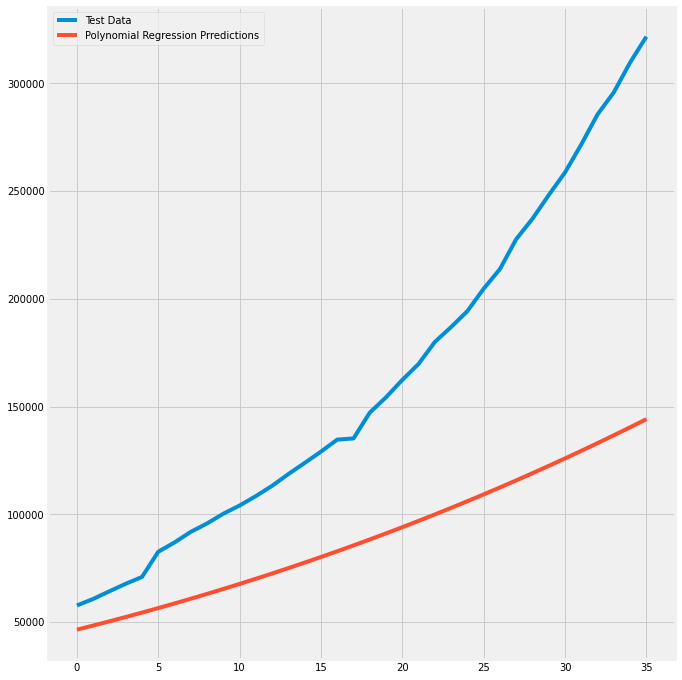

In [ ]:
plt.plot(Y_test_recovered)
plt.plot(Y_pred_recovered)
plt.legend(['Test Data','Polynomial Regression Prredictions'])

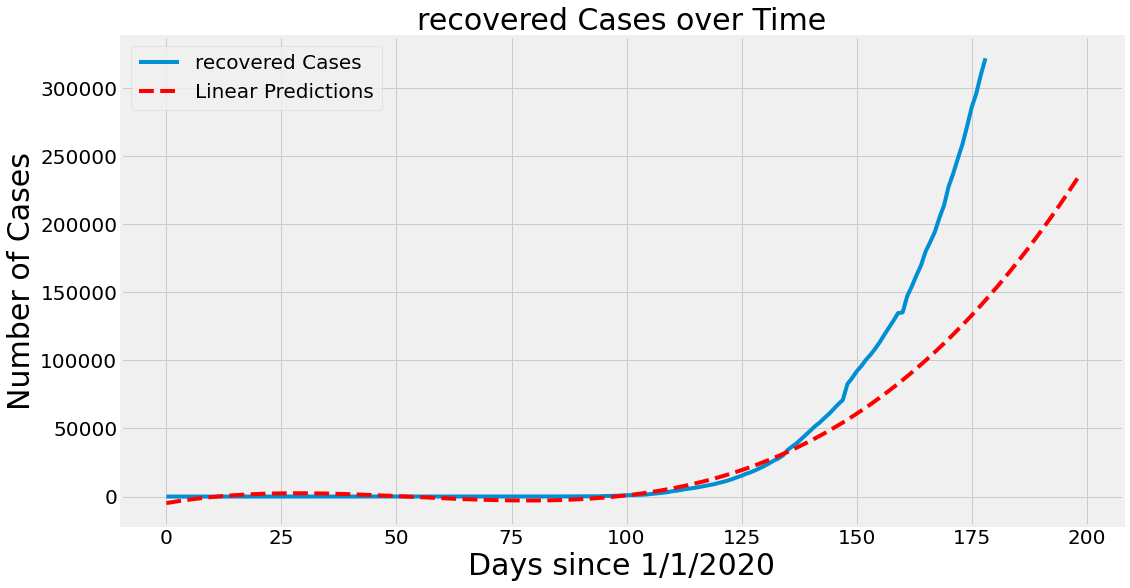

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_recovered)
plt.plot(future_forecast,future_pred_recovered,linestyle='dashed',color='red')
plt.title('recovered Cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['recovered Cases','Linear Predictions'],prop={'size':20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
tmp=future_pred_recovered
future_pred_recovered=np.append(tmp[0],tmp[1:])

In [ ]:
linear_df=pd.DataFrame({'Date':future_forecast_dates[-20:],'Recovered Predicted # number of Confirmed cases in India':np.round(future_pred_recovered[-20:])})
linear_df

,Date,Recovered Predicted # number of Confirmed cases in India
0,2020-06-28,147991.0
1,2020-06-29,151888.0
2,2020-06-30,155851.0
3,2020-07-01,159878.0
4,2020-07-02,163971.0
5,2020-07-03,168131.0
6,2020-07-04,172357.0
7,2020-07-05,176650.0
8,2020-07-06,181012.0
9,2020-07-07,185441.0
